# BIKE SHARING ASSIGNMENT 

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
#importing the necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
 


## Reading and Understanding the Data 

In [3]:
#Reading the days.csv file into the notebook 
df= pd.read_csv("day.csv") 
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
#Inspecting the shape of the dataframe 
df.shape

(730, 16)

In [5]:
#Looking into the statistical summary of the data
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- It can be seen that the categorical columns like 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday' and 'weathersit' have been represented numerically and hence have int datatype assigned to them. 
These values must be converted to categorical string values so that the model does not interpret them as having a ranking of any sort and give incorrect results.  

- Then the columns 'instant' and 'dteday' doesn't seem to be of any importance here, so it's better to drop them here.


In [7]:
# Checking values of season column
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [8]:
# Now, moving on to changing the numerical values in categorical columns to string values. 
# Changing values of 'season' column to strings
def obj_map1(x):
    return x.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

df[['season']] = df[['season']].apply(obj_map1) 

# Checking if the changes have been made 
df.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [9]:
# Checking values of yr column
df.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [10]:
# Changing values of 'yr' column to strings 
def obj_map2(x):
    return x.map({0:'2018',1:'2019'})

df[['yr']] = df[['yr']].apply(obj_map2) 

# Checking if the changes have been made 
df.yr.value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [11]:
# Checking values of 'mnth' column 
df.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [12]:
# Changing values of 'mnth' column to strings 
def obj_map3(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

df[['mnth']] = df[['mnth']].apply(obj_map3) 

# Checking if the changes have been made 
df.mnth.value_counts()

Aug    62
Mar    62
May    62
Oct    62
Jan    62
Dec    62
Jul    62
Nov    60
Sep    60
Apr    60
Jun    60
Feb    56
Name: mnth, dtype: int64

In [13]:
# Checking values of holiday column 
df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [14]:
# Changing values of 'holiday' column to strings, taking 0 as a not a holiday and 1 as a holiday because the value 1 has lesser entries and is more likely to represent the holidays in a year.
def obj_map4(x):
    return x.map({0:'Not Holiday',1:'Holiday'})

df[['holiday']] = df[['holiday']].apply(obj_map4) 

# Checking if the changes have been made 
df.holiday.value_counts()

Not Holiday    709
Holiday         21
Name: holiday, dtype: int64

In [15]:
# Checking values of weekday column
df.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [16]:
# Checking dates and weekday column values, to help identify which number corresponds to what day of the week in the dataset
df[["dteday","weekday"]]

dteday  weekday
0    01-01-2018        1
1    02-01-2018        2
2    03-01-2018        3
3    04-01-2018        4
4    05-01-2018        5
..          ...      ...
725  27-12-2019        5
726  28-12-2019        6
727  29-12-2019        0
728  30-12-2019        1
729  31-12-2019        2

[730 rows x 2 columns]

In [17]:
# To find out which week day correpsonds to each number in 'weekday' column we try using the datetime function in python 
import datetime 
import calendar 
  
def findDay(date): 
    dayofweek = datetime.datetime.strptime(date, '%d %m %Y').weekday() 
    return (calendar.day_name[dayofweek]) 
  
# The check 
date = '29 12 2019'
print(findDay(date))  

date= '30 12 2019' 
print(findDay(date))

Sunday
Monday


In [18]:
# Changing values of 'weekday' column to strings. 
# The labels for the values were decided upon by checking the day of date 29-12-2019 in the dataset which had value 0 in weekday column and same way value 1 was found to correspond to Monday.
def obj_map5(x):
    return x.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

df[['weekday']] = df[['weekday']].apply(obj_map5) 

# Checking if the changes have been made 
df.weekday.value_counts()

Tuesday      105
Monday       105
Thursday     104
Sunday       104
Friday       104
Wednesday    104
Saturday     104
Name: weekday, dtype: int64

In [19]:
# Checking values of working day column 
df.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [20]:
# Changing values of 'workingday' column to strings 
def obj_map6(x):
    return x.map({0:'Non-working day',1:'Working day'})

df[['workingday']] = df[['workingday']].apply(obj_map6) 

# Checking if the changes have been made 
df.workingday.value_counts()

Working day        504
Non-working day    226
Name: workingday, dtype: int64

In [21]:
# Checking values of weathersit column 
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [22]:
# Changing values of 'weathersit' column to strings  
# As per data dictionary the values assigned to labels are as folows, but in the data set only 1, 2 and 3 values exist 
#- 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
#- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
# So, here its understood that the given dataset is probabaly a subset of the original and hence the value 4 is missing 
# Here, the strings are renamed as follows 1: Clear, 2: Partially Clear, 3: Slightly Bad Weather
def obj_map7(x):
    return x.map({1:'Clear',2:'Partially Clear',3:'Slightly Bad Weather'})

df[['weathersit']] = df[['weathersit']].apply(obj_map7) 

# Checking if the changes have been made 
df.weathersit.value_counts()

Clear                   463
Partially Clear         246
Slightly Bad Weather     21
Name: weathersit, dtype: int64

In [23]:
#Deleting the columns 'instant' and 'dteday' 
del df['instant']
del df['dteday']

In [24]:
# Checking the new dataframe to see if the columns 'instant' and 'dteday' have been removed
df.head()

season    yr mnth      holiday    weekday   workingday       weathersit  \
0  Spring  2018  Jan  Not Holiday     Monday  Working day  Partially Clear   
1  Spring  2018  Jan  Not Holiday    Tuesday  Working day  Partially Clear   
2  Spring  2018  Jan  Not Holiday  Wednesday  Working day            Clear   
3  Spring  2018  Jan  Not Holiday   Thursday  Working day            Clear   
4  Spring  2018  Jan  Not Holiday     Friday  Working day            Clear   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

In [25]:
# Inspecting the columns and dataypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 80.0+ KB


- All the columns have the right datatypes now, so we move on to data visualisation 

## Data Visualisation

In [26]:
# First the categorical columns are visualised  
df_categorical=df.select_dtypes(exclude=['float64','int64'])
df_categorical.columns 

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

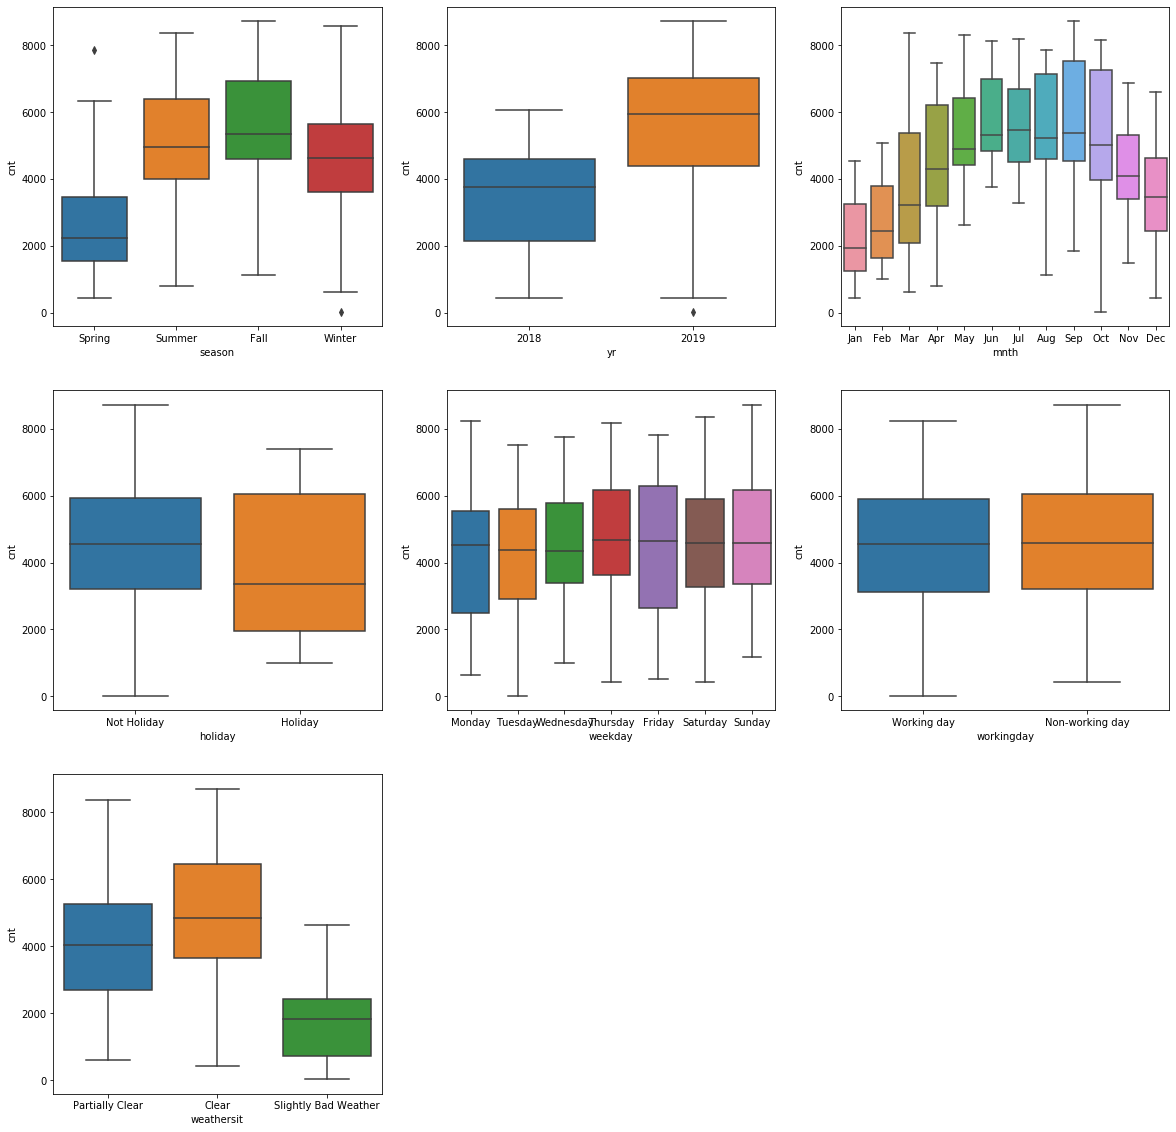

In [27]:
# Plotting boxplots of categorical columns vs target varable= 'cnt' 

plt.figure(figsize=(20,20)) 
plt.subplot(3,3,1) 
sns.boxplot(x='season',y='cnt',data=df) 
plt.subplot(3,3,2) 
sns.boxplot(x='yr',y='cnt',data=df) 
plt.subplot(3,3,3) 
sns.boxplot(x='mnth',y='cnt',data=df) 
plt.subplot(3,3,4) 
sns.boxplot(x='holiday',y='cnt',data=df) 
plt.subplot(3,3,5) 
sns.boxplot(x= 'weekday',y='cnt',data=df) 
plt.subplot(3,3,6) 
sns.boxplot(x='workingday',y='cnt',data=df) 
plt.subplot(3,3,7) 
sns.boxplot(x='weathersit',y='cnt',data=df) 
plt.show()

The observations from the boxplots are as follows,
- The data seems to be fairly well behaved with most categorical columns having no outliers, the only ones that do have outliers are season and yr columns but the outliers are not that much so we leave them as such. 
- The number of users of the bike sharing service seem to be higher in the year 2019 than in 2018.  
- The number of users are higher in summer and fall months, which is generally categorised by calmer weather. 
- There are more users of the bike sharing service in a clear weathersit, which is the most favourable condition for bike riding. 
- Whether the day is a working day or not does not seem to have any effect on the number of users, a similar trend can be seen for days of the week. 
- The months of January, February, November and December have fewer users when compared to other months, this could be due to the fact that these months generally have harsher weather conditions which are not favourable for bike riding. 
- From the boxplot of cnt vs holiday, it can be seen that the median of users in days that are holidays is lower than that of users in days which are not holidays.

In [28]:
# Visulaisation of Numerical Columns 
df_numerical=df.select_dtypes(include=['int64','float64']) 
df_numerical.columns


Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

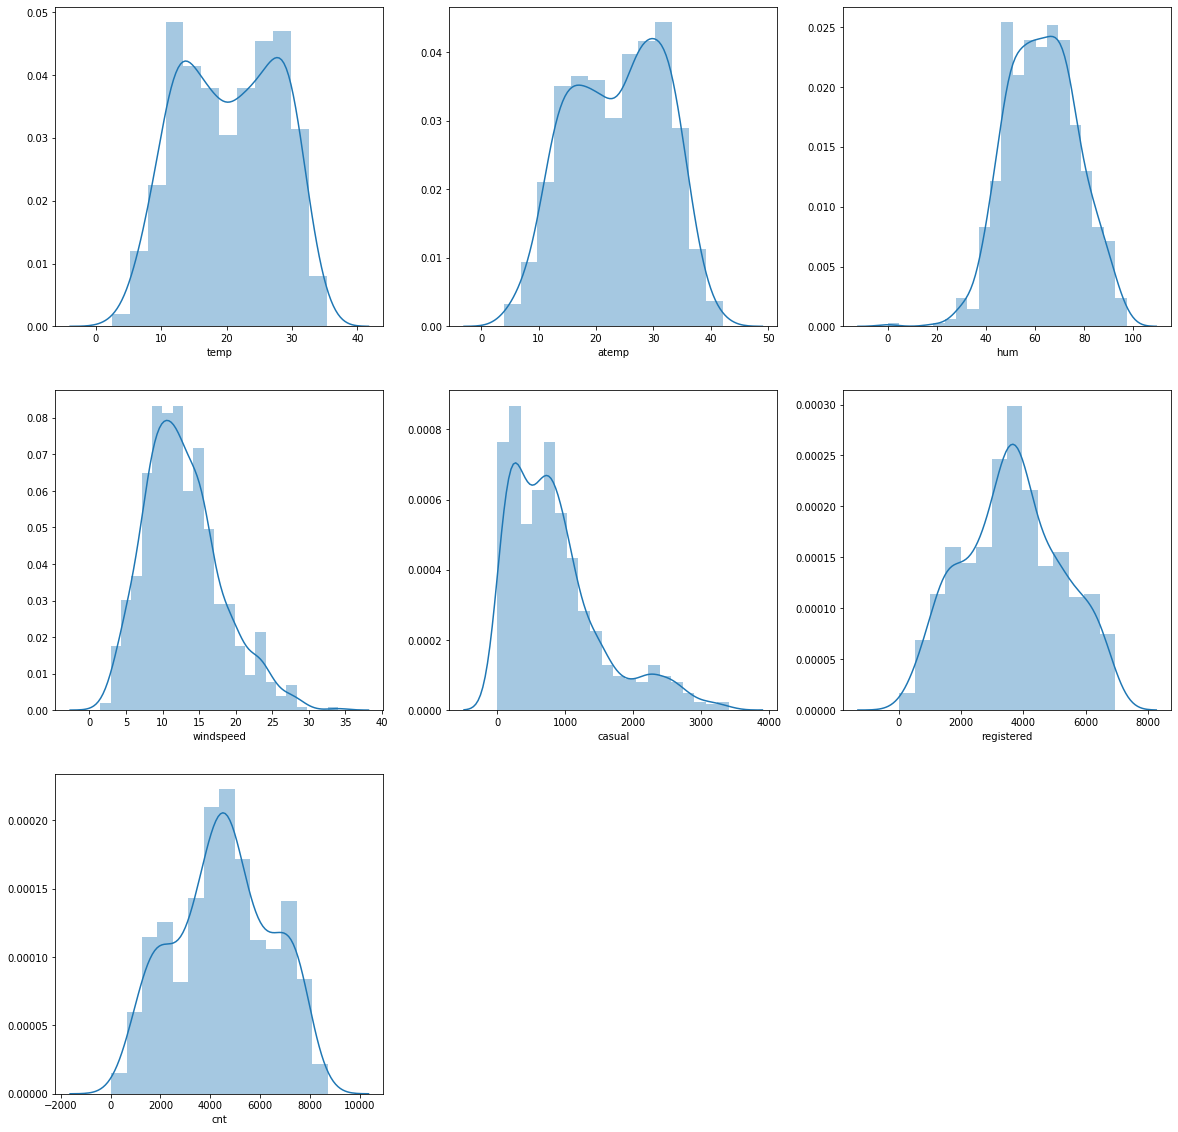

In [29]:
# Distplots of numerical columns
plt.figure(figsize=(20,20)) 
plt.subplot(3,3,1) 
sns.distplot(df['temp']) 
plt.subplot(3,3,2) 
sns.distplot(df['atemp']) 
plt.subplot(3,3,3) 
sns.distplot(df['hum']) 
plt.subplot(3,3,4) 
sns.distplot(df['windspeed']) 
plt.subplot(3,3,5) 
sns.distplot(df['casual']) 
plt.subplot(3,3,6) 
sns.distplot(df['registered']) 
plt.subplot(3,3,7) 
sns.distplot(df['cnt']) 
plt.show()

- The variables 'cnt','registered', 'hum' and 'windspeed' seem to follow a normal distribution while the rest do not.

<Figure size 1440x1440 with 0 Axes>

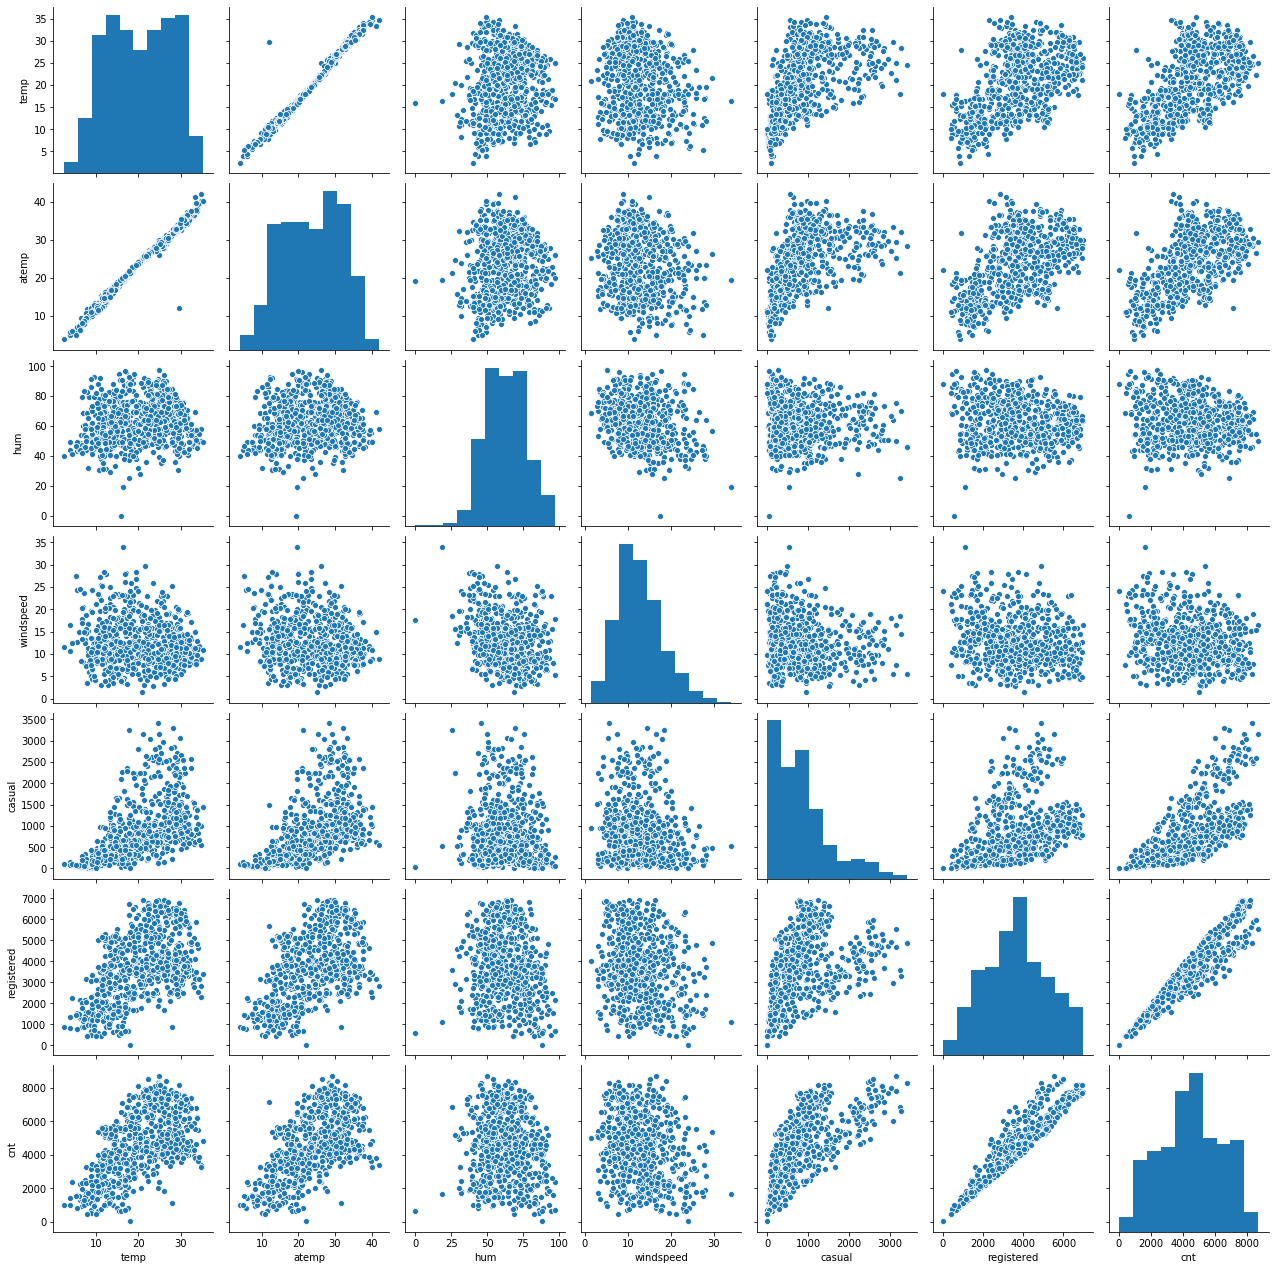

In [30]:
# Pairplots of numerical columns 
plt.figure(figsize=(20,20))
sns.pairplot(df_numerical[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
plt.show()

The observations from the pairplot are as follows, 
- There seems to be a positive correlation for cnt column with the columns temp,atemp, casual and registered(this particular correlation being very high). 
- There seems to be a very high positive correlation between temp and atemp. 

In [31]:
# To understand the correlations better we use a correlation matrix and visulaise the same using a heatmap. 
correlation= df_numerical.corr() 
correlation

temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.991696  0.128565  -0.158186  0.542731    0.539436   
atemp       0.991696  1.000000  0.141512  -0.183876  0.543362    0.543678   
hum         0.128565  0.141512  1.000000  -0.248506 -0.075211   -0.089212   
windspeed  -0.158186 -0.183876 -0.248506   1.000000 -0.167995   -0.217914   
casual      0.542731  0.543362 -0.075211  -0.167995  1.000000    0.394137   
registered  0.539436  0.543678 -0.089212  -0.217914  0.394137    1.000000   
cnt         0.627044  0.630685 -0.098543  -0.235132  0.672123    0.945411   

                 cnt  
temp        0.627044  
atemp       0.630685  
hum        -0.098543  
windspeed  -0.235132  
casual      0.672123  
registered  0.945411  
cnt         1.000000

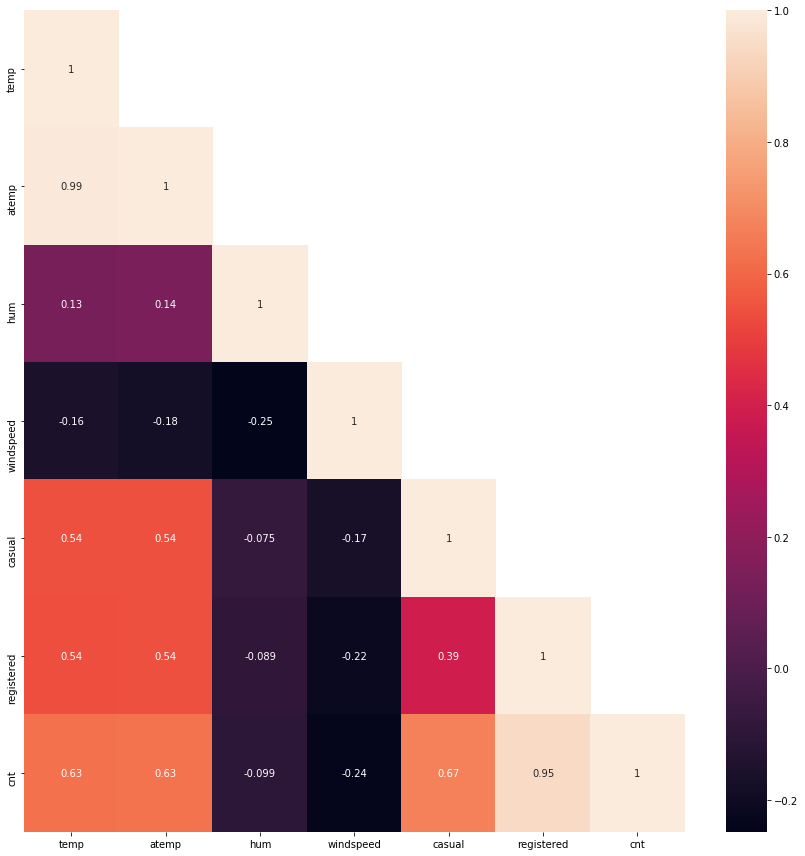

In [32]:
# Visualising using heatmap 
mask = np.array(correlation)
mask[np.tril_indices_from(mask)]=False
plt.figure(figsize=(12,12))
sns.heatmap(correlation,mask=mask,annot=True);
plt.tight_layout()

- From the heatmap above it can be clearly seen that temp and atemp are highly correlated,thus this is a case of multicollinearity. To avoid problems created by multicollinearity in model building, the 'atemp' column is chosen for dropping. 
- The columns regsitered and casual are highly correlated with the target variable cnt, and since cnt is basically a sum of the casual and registered columns it's better to drop them here as they will not be of much use in this study.

In [33]:
#Dropping the columns 'casual', 'registered' and 'atemp' 
del df['atemp'] 
del df['casual'] 
del df['registered'] 

# Checking if the changes have been made, 
df.head()

season    yr mnth      holiday    weekday   workingday       weathersit  \
0  Spring  2018  Jan  Not Holiday     Monday  Working day  Partially Clear   
1  Spring  2018  Jan  Not Holiday    Tuesday  Working day  Partially Clear   
2  Spring  2018  Jan  Not Holiday  Wednesday  Working day            Clear   
3  Spring  2018  Jan  Not Holiday   Thursday  Working day            Clear   
4  Spring  2018  Jan  Not Holiday     Friday  Working day            Clear   

        temp      hum  windspeed   cnt  
0  14.110847  80.5833  10.749882   985  
1  14.902598  69.6087  16.652113   801  
2   8.050924  43.7273  16.636703  1349  
3   8.200000  59.0435  10.739832  1562  
4   9.305237  43.6957  12.522300  1600

## Data Preparation 

The data preparation phase consists of three parts 
1. One Hot Encoding of Categroical Variables 
2. Train Test Split 
3. Scaling of the numerical columns (target variable 'cnt' is not scaled)

In [34]:
df_categorical=df.select_dtypes(include=['object']) 
df_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [35]:
# OHE of categorical variables 
df_dummies=pd.get_dummies(df_categorical,drop_first=True) 
df_dummies.head()

season_Spring  season_Summer  season_Winter  yr_2019  mnth_Aug  mnth_Dec  \
0              1              0              0        0         0         0   
1              1              0              0        0         0         0   
2              1              0              0        0         0         0   
3              1              0              0        0         0         0   
4              1              0              0        0         0         0   

   mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  ...  holiday_Not Holiday  \
0         0         1         0         0  ...                    1   
1         0         1         0         0  ...                    1   
2         0         1         0         0  ...                    1   
3         0         1         0         0  ...                    1   
4         0         1         0         0  ...                    1   

   weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thursday  \
0               1                 0               0                 0   
1               0                 0               0                 0   
2               0                 0               0                 0   
3               0                 0               0                 1   
4               0                 0               0                 0   

   weekday_Tuesday  weekday_Wednesday  workingday_Working day  \
0                0                  0                       1   
1                1                  0                       1   
2                0                  1                       1   
3                0                  0                       1   
4                0                  0                       1   

   weathersit_Partially Clear  weathersit_Slightly Bad Weather  
0                           1                                0  
1                           1                                0  
2                           0                                0  
3                           0                                0  
4                           0                                0  

[5 rows x 25 columns]

In [36]:
#Dropping the categorical columns from original dataframe
df.drop(df_categorical.columns,axis=1,inplace=True) 

In [37]:
#Checking the original dataframe to see if changes have been made 
df.head()

temp      hum  windspeed   cnt
0  14.110847  80.5833  10.749882   985
1  14.902598  69.6087  16.652113   801
2   8.050924  43.7273  16.636703  1349
3   8.200000  59.0435  10.739832  1562
4   9.305237  43.6957  12.522300  1600

In [38]:
# Adding the dummies to the original dataframe 
df = pd.concat([df, df_dummies],axis=1)

In [39]:
# Checking the original datframe again. 
df.head()

temp      hum  windspeed   cnt  season_Spring  season_Summer  \
0  14.110847  80.5833  10.749882   985              1              0   
1  14.902598  69.6087  16.652113   801              1              0   
2   8.050924  43.7273  16.636703  1349              1              0   
3   8.200000  59.0435  10.739832  1562              1              0   
4   9.305237  43.6957  12.522300  1600              1              0   

   season_Winter  yr_2019  mnth_Aug  mnth_Dec  ...  holiday_Not Holiday  \
0              0        0         0         0  ...                    1   
1              0        0         0         0  ...                    1   
2              0        0         0         0  ...                    1   
3              0        0         0         0  ...                    1   
4              0        0         0         0  ...                    1   

   weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thursday  \
0               1                 0               0                 0   
1               0                 0               0                 0   
2               0                 0               0                 0   
3               0                 0               0                 1   
4               0                 0               0                 0   

   weekday_Tuesday  weekday_Wednesday  workingday_Working day  \
0                0                  0                       1   
1                1                  0                       1   
2                0                  1                       1   
3                0                  0                       1   
4                0                  0                       1   

   weathersit_Partially Clear  weathersit_Slightly Bad Weather  
0                           1                                0  
1                           1                                0  
2                           0                                0  
3                           0                                0  
4                           0                                0  

[5 rows x 29 columns]

In [40]:
df.shape

(730, 29)

In [41]:
# Moving on to test-train split 
import sklearn 
from sklearn.model_selection import train_test_split 
df_train,df_test = train_test_split(df,train_size=0.7,random_state=100) 
print(df_train.shape) 
print(df_test.shape)

(510, 29)
(220, 29)


In [42]:
# Scaling of numerical columns 
from sklearn.preprocessing import MinMaxScaler 
scaler= MinMaxScaler() 
numerical_variables=['temp','hum','windspeed','cnt'] 
df_train[numerical_variables]=scaler.fit_transform(df_train[numerical_variables]) 
df_train.head()

temp       hum  windspeed       cnt  season_Spring  season_Summer  \
576  0.815169  0.725633   0.264686  0.827658              0              0   
426  0.442393  0.640189   0.255342  0.465255              1              0   
728  0.245101  0.498067   0.663106  0.204096              1              0   
482  0.395666  0.504508   0.188475  0.482973              0              1   
111  0.345824  0.751824   0.380981  0.191095              0              1   

     season_Winter  yr_2019  mnth_Aug  mnth_Dec  ...  holiday_Not Holiday  \
576              0        1         0         0  ...                    1   
426              0        1         0         0  ...                    1   
728              0        1         0         1  ...                    1   
482              0        1         0         0  ...                    1   
111              0        0         0         0  ...                    1   

     weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thursday  \
576               0                 0               0                 0   
426               0                 0               1                 0   
728               1                 0               0                 0   
482               0                 0               1                 0   
111               0                 0               1                 0   

     weekday_Tuesday  weekday_Wednesday  workingday_Working day  \
576                0                  1                       1   
426                0                  0                       0   
728                0                  0                       1   
482                0                  0                       0   
111                0                  0                       0   

     weathersit_Partially Clear  weathersit_Slightly Bad Weather  
576                           0                                0  
426                           1                                0  
728                           0                                0  
482                           1                                0  
111                           1                                0  

[5 rows x 29 columns]

With this the data preparation is complete and we move on to training the model 

## Training the Model 

In [43]:
# Getting X_train and y_train 
X_train=df_train 
y_train=df_train.pop('cnt') 

In [44]:
# Building a model with all vraiables 
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train) 
lr=sm.OLS(y_train,X_train_sm) 
lr_model=lr.fit() 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.34e-178
Time:                        22:54:37   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2564      0.054      4.741      0.000       0.150       0.363
temp                                0.4405      0.047      9.412      0.000       0.349       0.532
hum                                -0.1574      0.039     -4.043      0.000      -0.234      -0.081
windspeed                          -0.1825      0.026     -7.003      0.000      -0.234      -0.131
season_Spring                      -0.0404      0.030     -1.335      0.182      -0.100       0.019
season_Summer                       0.0464      0.026      1.761      0.079      -0.005       0.098
season_Winter                       0.1126      0.028      3.994      0.000       0.057       0.168
yr_2019                             0.2311      0.008     28.384      0.000       0.215       0.247
mnth_Aug                            0.0273      0.034      0.806      0.421      -0.039       0.094
mnth_Dec                           -0.0444      0.034     -1.309      0.191      -0.111       0.022
mnth_Feb                           -0.0374      0.033     -1.123      0.262      -0.103       0.028
mnth_Jan                           -0.0642      0.034     -1.894      0.059      -0.131       0.002
mnth_Jul                           -0.0285      0.035     -0.808      0.420      -0.098       0.041
mnth_Jun                            0.0084      0.025      0.336      0.737      -0.041       0.058
mnth_Mar                            0.0008      0.025      0.032      0.974      -0.048       0.050
mnth_May                            0.0247      0.021      1.164      0.245      -0.017       0.066
mnth_Nov                           -0.0396      0.037     -1.077      0.282      -0.112       0.033
mnth_Oct                            0.0056      0.036      0.156      0.876      -0.066       0.077
mnth_Sep                            0.0908      0.032      2.822      0.005       0.028       0.154
holiday_Not Holiday                 0.1348      0.065      2.059      0.040       0.006       0.263
weekday_Monday                     -0.0246      0.015     -1.687      0.092      -0.053       0.004
weekday_Saturday                   -0.0557      0.072     -0.777      0.437      -0.197       0.085
weekday_Sunday                     -0.0495      0.072     -0.691      0.490      -0.190       0.091
weekday_Thursday                    0.0042      0.015      0.282      0.778      -0.025       0.034
weekday_Tuesday                    -0.0261      0.015     -1.774      0.077      -0.055       0.003
weekday_Wednesday                  -0.0102      0.015     -0.669      0.504      -0.040       0.020
workingday_Working day             -0.0600      0.071     -0.844      0.399      -0.200       0.080
weathersit_Partially Clear         -0.0578      0.011     -5.495      0.000      -0

In [45]:
# Making Predictions on this model 
# Firstly,scaling numerical variables of the test dataset 
df_test[numerical_variables]=scaler.transform(df_test[numerical_variables]) 
df_test.head() 

temp       hum  windspeed       cnt  season_Spring  season_Summer  \
184  0.831783  0.657364   0.084219  0.692706              0              0   
535  0.901354  0.610133   0.153728  0.712034              0              1   
299  0.511964  0.837699   0.334206  0.303382              0              0   
221  0.881625  0.437098   0.339570  0.547400              0              0   
152  0.817246  0.314298   0.537414  0.569029              0              1   

     season_Winter  yr_2019  mnth_Aug  mnth_Dec  ...  holiday_Not Holiday  \
184              0        0         0         0  ...                    0   
535              0        1         0         0  ...                    1   
299              1        0         0         0  ...                    1   
221              0        0         1         0  ...                    1   
152              0        0         0         0  ...                    1   

     weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thursday  \
184               0                 0               0                 0   
535               0                 0               0                 1   
299               0                 1               0                 0   
221               0                 0               0                 0   
152               0                 1               0                 0   

     weekday_Tuesday  weekday_Wednesday  workingday_Working day  \
184                0                  1                       0   
535                0                  0                       1   
299                0                  0                       0   
221                0                  0                       1   
152                0                  0                       0   

     weathersit_Partially Clear  weathersit_Slightly Bad Weather  
184                           1                                0  
535                           0                                0  
299                           1                                0  
221                           0                                0  
152                           0                                0  

[5 rows x 29 columns]

In [46]:
# Getting X_test and y_test 
y_test= df_test.pop('cnt') 
X_test= df_test

In [47]:
# Adding a constant 
X_test_sm=sm.add_constant(X_test) 
X_test_sm.head()

const      temp       hum  windspeed  season_Spring  season_Summer  \
184    1.0  0.831783  0.657364   0.084219              0              0   
535    1.0  0.901354  0.610133   0.153728              0              1   
299    1.0  0.511964  0.837699   0.334206              0              0   
221    1.0  0.881625  0.437098   0.339570              0              0   
152    1.0  0.817246  0.314298   0.537414              0              1   

     season_Winter  yr_2019  mnth_Aug  mnth_Dec  ...  holiday_Not Holiday  \
184              0        0         0         0  ...                    0   
535              0        1         0         0  ...                    1   
299              1        0         0         0  ...                    1   
221              0        0         1         0  ...                    1   
152              0        0         0         0  ...                    1   

     weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thursday  \
184               0                 0               0                 0   
535               0                 0               0                 1   
299               0                 1               0                 0   
221               0                 0               0                 0   
152               0                 1               0                 0   

     weekday_Tuesday  weekday_Wednesday  workingday_Working day  \
184                0                  1                       0   
535                0                  0                       1   
299                0                  0                       0   
221                0                  0                       1   
152                0                  0                       0   

     weathersit_Partially Clear  weathersit_Slightly Bad Weather  
184                           1                                0  
535                           0                                0  
299                           1                                0  
221                           0                                0  
152                           0                                0  

[5 rows x 29 columns]

In [48]:
# Making the predictions 
y_test_pred=lr_model.predict(X_test_sm)

In [49]:
# Evaluating this model 
from sklearn.metrics import r2_score 
r2_score(y_true=y_test,y_pred=y_test_pred) 

0.8289018760341199

This R-squared value is comparable to the one obtained during training (which was = 0.85), thus we can conclude that the model is able to generalise what it learned pretty well.

In [50]:
# Model Building Using RFE 
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression 

# Running RFE with the output number of the varaiables equal to 20 
lm= LinearRegression() 
lm.fit(X_train,y_train) 
rfe=RFE(lm,20) 
rfe= rfe.fit(X_train,y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 4),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 6),
 ('mnth_Mar', False, 9),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sep', True, 1),
 ('holiday_Not Holiday', True, 1),
 ('weekday_Monday', False, 2),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 8),
 ('weekday_Tuesday', True, 1),
 ('weekday_Wednesday', False, 5),
 ('workingday_Working day', True, 1),
 ('weathersit_Partially Clear', True, 1),
 ('weathersit_Slightly Bad Weather', True, 1)]

In [52]:
col= X_train.columns[rfe.support_] 
col

Index(['temp', 'hum', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'yr_2019', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'holiday_Not Holiday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Tuesday',
       'workingday_Working day', 'weathersit_Partially Clear',
       'weathersit_Slightly Bad Weather'],
      dtype='object')

In [53]:
# Building a model using columns selected by RFE  
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

temp       hum  windspeed  season_Spring  season_Summer  \
576  0.815169  0.725633   0.264686              0              0   
426  0.442393  0.640189   0.255342              1              0   
728  0.245101  0.498067   0.663106              1              0   
482  0.395666  0.504508   0.188475              0              1   
111  0.345824  0.751824   0.380981              0              1   

     season_Winter  yr_2019  mnth_Dec  mnth_Feb  mnth_Jan  mnth_Jul  mnth_Nov  \
576              0        1         0         0         0         1         0   
426              0        1         0         0         0         0         0   
728              0        1         1         0         0         0         0   
482              0        1         0         0         0         0         0   
111              0        0         0         0         0         0         0   

     mnth_Sep  holiday_Not Holiday  weekday_Saturday  weekday_Sunday  \
576         0                    1                 0               0   
426         0                    1                 0               1   
728         0                    1                 0               0   
482         0                    1                 0               1   
111         0                    1                 0               1   

     weekday_Tuesday  workingday_Working day  weathersit_Partially Clear  \
576                0                       1                           0   
426                0                       0                           1   
728                0                       1                           0   
482                0                       0                           1   
111                0                       0                           1   

     weathersit_Slightly Bad Weather  
576                                0  
426                                0  
728                                0  
482                                0  
111                                0

In [54]:
# Checking shape of X_train_rfe 
X_train_rfe.shape

(510, 20)

In [55]:
X_train_rfe_sm= sm.add_constant(X_train_rfe) 
lr2=sm.OLS(y_train,X_train_rfe_sm) 
lr2_model=lr2.fit() 
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.90e-185
Time:                        22:54:45   Log-Likelihood:                 519.42
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     489   BIC:                            -907.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2468      0.047      5.295      0.000       0.155       0.338
temp                                0.4630      0.038     12.149      0.000       0.388       0.538
hum                                -0.1510      0.038     -3.990      0.000      -0.225      -0.077
windspeed                          -0.1866      0.026     -7.247      0.000      -0.237      -0.136
season_Spring                      -0.0516      0.022     -2.345      0.019      -0.095      -0.008
season_Summer                       0.0401      0.015      2.607      0.009       0.010       0.070
season_Winter                       0.1022      0.018      5.683      0.000       0.067       0.138
yr_2019                             0.2309      0.008     28.600      0.000       0.215       0.247
mnth_Dec                           -0.0470      0.018     -2.564      0.011      -0.083      -0.011
mnth_Feb                           -0.0348      0.022     -1.607      0.109      -0.077       0.008
mnth_Jan                           -0.0627      0.021     -2.924      0.004      -0.105      -0.021
mnth_Jul                           -0.0525      0.018     -2.882      0.004      -0.088      -0.017
mnth_Nov                           -0.0418      0.019     -2.191      0.029      -0.079      -0.004
mnth_Sep                            0.0737      0.017      4.373      0.000       0.041       0.107
holiday_Not Holiday                 0.1332      0.065      2.037      0.042       0.005       0.262
weekday_Saturday                   -0.0429      0.071     -0.609      0.543      -0.182       0.096
weekday_Sunday                     -0.0370      0.070     -0.526      0.599      -0.175       0.101
weekday_Tuesday                    -0.0186      0.011     -1.623      0.105      -0.041       0.004
workingday_Working day             -0.0553      0.071     -0.783      0.434      -0.194       0.084
weathersit_Partially Clear         -0.0577      0.010     -5.505      0.000      -0.078      -0.037
weathersit_Slightly Bad Weather    -0.2531      0.026     -9.582      0.000      -0.305      -0.201
==============================================================================
Omnibus:                       78.746   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.978
Skew:                          -0.804   Prob(JB):                     2.50e-41
Kurtosis:                       5.493   Cond. No.                         69.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#Getting the columns that were removed by RFE 
removed_columns=X_train.columns[~rfe.support_] 
removed_columns

Index(['mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Monday', 'weekday_Thursday', 'weekday_Wednesday'],
      dtype='object')

In [57]:
# Making Predictions 
X_test_rfe_sm=sm.add_constant(X_test) 
X_test_rfe_sm.head()

const      temp       hum  windspeed  season_Spring  season_Summer  \
184    1.0  0.831783  0.657364   0.084219              0              0   
535    1.0  0.901354  0.610133   0.153728              0              1   
299    1.0  0.511964  0.837699   0.334206              0              0   
221    1.0  0.881625  0.437098   0.339570              0              0   
152    1.0  0.817246  0.314298   0.537414              0              1   

     season_Winter  yr_2019  mnth_Aug  mnth_Dec  ...  holiday_Not Holiday  \
184              0        0         0         0  ...                    0   
535              0        1         0         0  ...                    1   
299              1        0         0         0  ...                    1   
221              0        0         1         0  ...                    1   
152              0        0         0         0  ...                    1   

     weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thursday  \
184               0                 0               0                 0   
535               0                 0               0                 1   
299               0                 1               0                 0   
221               0                 0               0                 0   
152               0                 1               0                 0   

     weekday_Tuesday  weekday_Wednesday  workingday_Working day  \
184                0                  1                       0   
535                0                  0                       1   
299                0                  0                       0   
221                0                  0                       1   
152                0                  0                       0   

     weathersit_Partially Clear  weathersit_Slightly Bad Weather  
184                           1                                0  
535                           0                                0  
299                           1                                0  
221                           0                                0  
152                           0                                0  

[5 rows x 29 columns]

In [58]:
# Removing columns that were not selected by RFE  from X_test_rfe_sm  
X_test_rfe_sm.drop(removed_columns,axis=1,inplace=True)

In [59]:
X_test_rfe_sm.shape

(220, 21)

In [60]:
X_test_rfe_sm.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'yr_2019', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'holiday_Not Holiday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Tuesday',
       'workingday_Working day', 'weathersit_Partially Clear',
       'weathersit_Slightly Bad Weather'],
      dtype='object')

In [61]:
y_test_rfe_pred=lr2_model.predict(X_test_rfe_sm)

In [62]:
r2_score(y_true=y_test,y_pred=y_test_rfe_pred)

0.8271097796867376

- Once again the R-squared values shows that the model built using RFE selected variables is able to generalise what it learned well. 
- Comparing the adjusted R-squared values of the models built with and without using RFE, it can be seen that the adjusted R-squared value of RFE model is slightly higher than that of the other.(Adjusted R squared of RFE model= 0.842 and the other model's = 0.841) 
- Thus, we can see that the RFE selected model is able to make predictions just as well as the one without using RFE. So, here we proceed with the RFE model and continue to work on it to arrive at a better linear regression model.

## Training the Model

In [63]:
# Final Model Building 
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.90e-185
Time:                        22:54:49   Log-Likelihood:                 519.42
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     489   BIC:                            -907.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2468      0.047      5.295      0.000       0.155       0.338
temp                                0.4630      0.038     12.149      0.000       0.388       0.538
hum                                -0.1510      0.038     -3.990      0.000      -0.225      -0.077
windspeed                          -0.1866      0.026     -7.247      0.000      -0.237      -0.136
season_Spring                      -0.0516      0.022     -2.345      0.019      -0.095      -0.008
season_Summer                       0.0401      0.015      2.607      0.009       0.010       0.070
season_Winter                       0.1022      0.018      5.683      0.000       0.067       0.138
yr_2019                             0.2309      0.008     28.600      0.000       0.215       0.247
mnth_Dec                           -0.0470      0.018     -2.564      0.011      -0.083      -0.011
mnth_Feb                           -0.0348      0.022     -1.607      0.109      -0.077       0.008
mnth_Jan                           -0.0627      0.021     -2.924      0.004      -0.105      -0.021
mnth_Jul                           -0.0525      0.018     -2.882      0.004      -0.088      -0.017
mnth_Nov                           -0.0418      0.019     -2.191      0.029      -0.079      -0.004
mnth_Sep                            0.0737      0.017      4.373      0.000       0.041       0.107
holiday_Not Holiday                 0.1332      0.065      2.037      0.042       0.005       0.262
weekday_Saturday                   -0.0429      0.071     -0.609      0.543      -0.182       0.096
weekday_Sunday                     -0.0370      0.070     -0.526      0.599      -0.175       0.101
weekday_Tuesday                    -0.0186      0.011     -1.623      0.105      -0.041       0.004
workingday_Working day             -0.0553      0.071     -0.783      0.434      -0.194       0.084
weathersit_Partially Clear         -0.0577      0.010     -5.505      0.000      -0.078      -0.037
weathersit_Slightly Bad Weather    -0.2531      0.026     -9.582      0.000      -0.305      -0.201
==============================================================================
Omnibus:                       78.746   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.978
Skew:                          -0.804   Prob(JB):                     2.50e-41
Kurtosis:                       5.493   Cond. No.                         69.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# VIF Calculation 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif= pd.DataFrame() 
vif['Features']= X_train_rfe.columns 
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])] 
vif['VIF']= round(vif['VIF'],2) 
vif= vif.sort_values(by='VIF',ascending=False) 
vif

Features     VIF
13              holiday_Not Holiday  266.58
17           workingday_Working day  213.75
15                   weekday_Sunday   40.79
14                 weekday_Saturday   38.65
1                               hum   34.93
0                              temp   22.79
3                     season_Spring    6.12
2                         windspeed    5.07
5                     season_Winter    4.45
4                     season_Summer    3.14
9                          mnth_Jan    2.42
18       weathersit_Partially Clear    2.37
6                           yr_2019    2.11
8                          mnth_Feb    1.92
11                         mnth_Nov    1.91
7                          mnth_Dec    1.71
10                         mnth_Jul    1.62
12                         mnth_Sep    1.41
19  weathersit_Slightly Bad Weather    1.30
16                  weekday_Tuesday    1.29

In [65]:
#It can be observed that the weekday_Sunday variable has the highest p-value and has the third highest VIF value 
# Hence, we drop the weekday_Sunday variable 
del X_train_rfe['weekday_Sunday'] 
X_train_rfe.shape

(510, 19)

In [66]:
# Building another model 
X_train_rfe_sm=sm.add_constant(X_train_rfe) 
lr2=sm.OLS(y_train,X_train_rfe_sm) 
lr2_model=lr2.fit() 
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.80e-186
Time:                        22:54:51   Log-Likelihood:                 519.27
No. Observations:                 510   AIC:                            -998.5
Df Residuals:                     490   BIC:                            -913.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2406      0.045      5.341      0.000       0.152       0.329
temp                                0.4633      0.038     12.169      0.000       0.389       0.538
hum                                -0.1502      0.038     -3.976      0.000      -0.224      -0.076
windspeed                          -0.1870      0.026     -7.271      0.000      -0.237      -0.136
season_Spring                      -0.0513      0.022     -2.334      0.020      -0.094      -0.008
season_Summer                       0.0402      0.015      2.617      0.009       0.010       0.070
season_Winter                       0.1022      0.018      5.687      0.000       0.067       0.138
yr_2019                             0.2311      0.008     28.707      0.000       0.215       0.247
mnth_Dec                           -0.0468      0.018     -2.559      0.011      -0.083      -0.011
mnth_Feb                           -0.0345      0.022     -1.597      0.111      -0.077       0.008
mnth_Jan                           -0.0625      0.021     -2.918      0.004      -0.105      -0.020
mnth_Jul                           -0.0526      0.018     -2.889      0.004      -0.088      -0.017
mnth_Nov                           -0.0428      0.019     -2.258      0.024      -0.080      -0.006
mnth_Sep                            0.0739      0.017      4.389      0.000       0.041       0.107
holiday_Not Holiday                 0.1019      0.027      3.730      0.000       0.048       0.156
weekday_Saturday                   -0.0067      0.015     -0.441      0.659      -0.037       0.023
weekday_Tuesday                    -0.0183      0.011     -1.602      0.110      -0.041       0.004
workingday_Working day             -0.0187      0.012     -1.558      0.120      -0.042       0.005
weathersit_Partially Clear         -0.0577      0.010     -5.508      0.000      -0.078      -0.037
weathersit_Slightly Bad Weather    -0.2529      0.026     -9.585      0.000      -0.305      -0.201
==============================================================================
Omnibus:                       78.805   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.010
Skew:                          -0.808   Prob(JB):                     6.69e-41
Kurtosis:                       5.468   Cond. No.                         29.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
#VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif= pd.DataFrame() 
vif['Features']= X_train_rfe.columns 
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])] 
vif['VIF']= round(vif['VIF'],2) 
vif= vif.sort_values(by='VIF',ascending=False) 
vif

Features    VIF
1                               hum  34.79
13              holiday_Not Holiday  32.62
0                              temp  22.33
16           workingday_Working day   6.58
3                     season_Spring   6.06
2                         windspeed   5.01
5                     season_Winter   4.41
4                     season_Summer   3.11
9                          mnth_Jan   2.42
17       weathersit_Partially Clear   2.36
6                           yr_2019   2.10
14                 weekday_Saturday   1.94
8                          mnth_Feb   1.92
11                         mnth_Nov   1.85
7                          mnth_Dec   1.71
10                         mnth_Jul   1.62
12                         mnth_Sep   1.41
18  weathersit_Slightly Bad Weather   1.29
15                  weekday_Tuesday   1.28

- The R-squared value hasn't changed but there is a definite change in VIF values indicating that weekday_Sunday was causing a problem of multicollinearity. 
- weekday_Saturday has very high p-value, despite having a low VIF value, so in the next step we drop this column 

In [68]:
del X_train_rfe['weekday_Saturday'] 
X_train_rfe.shape

(510, 18)

In [69]:
# Building another model  
X_train_rfe_sm=sm.add_constant(X_train_rfe) 
lr2=sm.OLS(y_train,X_train_rfe_sm) 
lr2_model=lr2.fit() 
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.58e-187
Time:                        22:54:51   Log-Likelihood:                 519.17
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     491   BIC:                            -919.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2403      0.045      5.340      0.000       0.152       0.329
temp                                0.4629      0.038     12.172      0.000       0.388       0.538
hum                                -0.1503      0.038     -3.980      0.000      -0.224      -0.076
windspeed                          -0.1867      0.026     -7.269      0.000      -0.237      -0.136
season_Spring                      -0.0515      0.022     -2.347      0.019      -0.095      -0.008
season_Summer                       0.0401      0.015      2.612      0.009       0.010       0.070
season_Winter                       0.1022      0.018      5.690      0.000       0.067       0.137
yr_2019                             0.2312      0.008     28.756      0.000       0.215       0.247
mnth_Dec                           -0.0467      0.018     -2.553      0.011      -0.083      -0.011
mnth_Feb                           -0.0343      0.022     -1.589      0.113      -0.077       0.008
mnth_Jan                           -0.0625      0.021     -2.922      0.004      -0.105      -0.020
mnth_Jul                           -0.0524      0.018     -2.880      0.004      -0.088      -0.017
mnth_Nov                           -0.0433      0.019     -2.288      0.023      -0.080      -0.006
mnth_Sep                            0.0739      0.017      4.392      0.000       0.041       0.107
holiday_Not Holiday                 0.0991      0.027      3.735      0.000       0.047       0.151
weekday_Tuesday                    -0.0183      0.011     -1.604      0.109      -0.041       0.004
workingday_Working day             -0.0154      0.009     -1.642      0.101      -0.034       0.003
weathersit_Partially Clear         -0.0575      0.010     -5.504      0.000      -0.078      -0.037
weathersit_Slightly Bad Weather    -0.2534      0.026     -9.618      0.000      -0.305      -0.202
==============================================================================
Omnibus:                       77.751   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.253
Skew:                          -0.799   Prob(JB):                     2.66e-40
Kurtosis:                       5.455   Cond. No.                         29.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
#VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif= pd.DataFrame() 
vif['Features']= X_train_rfe.columns 
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])] 
vif['VIF']= round(vif['VIF'],2) 
vif= vif.sort_values(by='VIF',ascending=False) 
vif

Features    VIF
1                               hum  34.78
13              holiday_Not Holiday  29.84
0                              temp  22.30
3                     season_Spring   6.05
2                         windspeed   5.00
5                     season_Winter   4.41
15           workingday_Working day   4.03
4                     season_Summer   3.11
9                          mnth_Jan   2.42
16       weathersit_Partially Clear   2.36
6                           yr_2019   2.10
8                          mnth_Feb   1.92
11                         mnth_Nov   1.84
7                          mnth_Dec   1.71
10                         mnth_Jul   1.62
12                         mnth_Sep   1.41
17  weathersit_Slightly Bad Weather   1.29
14                  weekday_Tuesday   1.28

In [71]:
#Again no change in R-squared value, the next variable that has high p-value despite low vif to be removed is mnth_Feb 
del X_train_rfe['mnth_Feb'] 
X_train_rfe.shape

(510, 17)

In [72]:
#Buidling another model 
X_train_rfe_sm=sm.add_constant(X_train_rfe) 
lr2=sm.OLS(y_train,X_train_rfe_sm) 
lr2_model=lr2.fit() 
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.29e-188
Time:                        22:54:53   Log-Likelihood:                 517.86
No. Observations:                 510   AIC:                            -999.7
Df Residuals:                     492   BIC:                            -923.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2268      0.044      5.123      0.000       0.140       0.314
temp                                0.4782      0.037     12.975      0.000       0.406       0.551
hum                                -0.1521      0.038     -4.026      0.000      -0.226      -0.078
windspeed                          -0.1855      0.026     -7.214      0.000      -0.236      -0.135
season_Spring                      -0.0609      0.021     -2.879      0.004      -0.102      -0.019
season_Summer                       0.0433      0.015      2.839      0.005       0.013       0.073
season_Winter                       0.1039      0.018      5.786      0.000       0.069       0.139
yr_2019                             0.2309      0.008     28.679      0.000       0.215       0.247
mnth_Dec                           -0.0379      0.017     -2.169      0.031      -0.072      -0.004
mnth_Jan                           -0.0442      0.018     -2.448      0.015      -0.080      -0.009
mnth_Jul                           -0.0533      0.018     -2.928      0.004      -0.089      -0.018
mnth_Nov                           -0.0386      0.019     -2.063      0.040      -0.075      -0.002
mnth_Sep                            0.0753      0.017      4.479      0.000       0.042       0.108
holiday_Not Holiday                 0.1016      0.027      3.830      0.000       0.049       0.154
weekday_Tuesday                    -0.0185      0.011     -1.618      0.106      -0.041       0.004
workingday_Working day             -0.0156      0.009     -1.664      0.097      -0.034       0.003
weathersit_Partially Clear         -0.0573      0.010     -5.472      0.000      -0.078      -0.037
weathersit_Slightly Bad Weather    -0.2521      0.026     -9.559      0.000      -0.304      -0.200
==============================================================================
Omnibus:                       73.145   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.763
Skew:                          -0.758   Prob(JB):                     1.37e-37
Kurtosis:                       5.386   Cond. No.                         28.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
#VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif= pd.DataFrame() 
vif['Features']= X_train_rfe.columns 
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])] 
vif['VIF']= round(vif['VIF'],2) 
vif= vif.sort_values(by='VIF',ascending=False) 
vif

Features    VIF
1                               hum  34.33
12              holiday_Not Holiday  29.73
0                              temp  21.56
3                     season_Spring   5.07
2                         windspeed   5.00
5                     season_Winter   4.41
14           workingday_Working day   4.03
4                     season_Summer   3.10
15       weathersit_Partially Clear   2.36
6                           yr_2019   2.10
10                         mnth_Nov   1.82
8                          mnth_Jan   1.77
9                          mnth_Jul   1.61
7                          mnth_Dec   1.58
11                         mnth_Sep   1.41
16  weathersit_Slightly Bad Weather   1.29
13                  weekday_Tuesday   1.28

In [74]:
#The R-squared has dropped slightly 
# The next variable to be dropped is weekday Tuesday because of high p-value even though it has lowest vif value 
del X_train_rfe['weekday_Tuesday'] 
X_train_rfe.shape 

(510, 16)

In [75]:
#Buidling another model 
X_train_rfe_sm=sm.add_constant(X_train_rfe) 
lr2=sm.OLS(y_train,X_train_rfe_sm) 
lr2_model=lr2.fit() 
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.19e-188
Time:                        22:54:53   Log-Likelihood:                 516.51
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     493   BIC:                            -927.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2264      0.044      5.106      0.000       0.139       0.313
temp                                0.4787      0.037     12.966      0.000       0.406       0.551
hum                                -0.1560      0.038     -4.129      0.000      -0.230      -0.082
windspeed                          -0.1879      0.026     -7.309      0.000      -0.238      -0.137
season_Spring                      -0.0618      0.021     -2.919      0.004      -0.103      -0.020
season_Summer                       0.0426      0.015      2.791      0.005       0.013       0.073
season_Winter                       0.1023      0.018      5.698      0.000       0.067       0.138
yr_2019                             0.2305      0.008     28.594      0.000       0.215       0.246
mnth_Dec                           -0.0371      0.017     -2.125      0.034      -0.071      -0.003
mnth_Jan                           -0.0437      0.018     -2.417      0.016      -0.079      -0.008
mnth_Jul                           -0.0555      0.018     -3.055      0.002      -0.091      -0.020
mnth_Nov                           -0.0380      0.019     -2.026      0.043      -0.075      -0.001
mnth_Sep                            0.0748      0.017      4.442      0.000       0.042       0.108
holiday_Not Holiday                 0.1058      0.026      4.001      0.000       0.054       0.158
workingday_Working day             -0.0194      0.009     -2.125      0.034      -0.037      -0.001
weathersit_Partially Clear         -0.0568      0.010     -5.421      0.000      -0.077      -0.036
weathersit_Slightly Bad Weather    -0.2490      0.026     -9.451      0.000      -0.301      -0.197
==============================================================================
Omnibus:                       72.046   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.425
Skew:                          -0.747   Prob(JB):                     4.41e-37
Kurtosis:                       5.377   Cond. No.                         28.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif= pd.DataFrame() 
vif['Features']= X_train_rfe.columns 
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])] 
vif['VIF']= round(vif['VIF'],2) 
vif= vif.sort_values(by='VIF',ascending=False) 
vif

Features    VIF
1                               hum  34.16
12              holiday_Not Holiday  29.34
0                              temp  21.56
3                     season_Spring   5.07
2                         windspeed   4.98
5                     season_Winter   4.39
13           workingday_Working day   3.78
4                     season_Summer   3.09
14       weathersit_Partially Clear   2.36
6                           yr_2019   2.10
10                         mnth_Nov   1.82
8                          mnth_Jan   1.77
9                          mnth_Jul   1.60
7                          mnth_Dec   1.58
11                         mnth_Sep   1.41
15  weathersit_Slightly Bad Weather   1.28

In [77]:
# The R-squared value has dropped again, this time adjusted R-squared has also dropped 
# The p-values of all varaibles are in acceptable range now,so now start dropping variables with high vif values 
# Thus we drop 'hum' variable 
del X_train_rfe['hum'] 
X_train_rfe.shape 

(510, 15)

In [78]:
#Buidling another model 
X_train_rfe_sm=sm.add_constant(X_train_rfe) 
lr2=sm.OLS(y_train,X_train_rfe_sm) 
lr2_model=lr2.fit() 
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.69e-186
Time:                        22:54:54   Log-Likelihood:                 507.84
No. Observations:                 510   AIC:                            -983.7
Df Residuals:                     494   BIC:                            -915.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.1540      0.041      3.722      0.000       0.073       0.235
temp                                0.4373      0.036     12.112      0.000       0.366       0.508
windspeed                          -0.1589      0.025     -6.323      0.000      -0.208      -0.110
season_Spring                      -0.0715      0.021     -3.341      0.001      -0.114      -0.029
season_Summer                       0.0356      0.015      2.305      0.022       0.005       0.066
season_Winter                       0.0880      0.018      4.915      0.000       0.053       0.123
yr_2019                             0.2343      0.008     28.811      0.000       0.218       0.250
mnth_Dec                           -0.0444      0.018     -2.514      0.012      -0.079      -0.010
mnth_Jan                           -0.0500      0.018     -2.734      0.006      -0.086      -0.014
mnth_Jul                           -0.0506      0.018     -2.745      0.006      -0.087      -0.014
mnth_Nov                           -0.0387      0.019     -2.029      0.043      -0.076      -0.001
mnth_Sep                            0.0683      0.017      4.007      0.000       0.035       0.102
holiday_Not Holiday                 0.1087      0.027      4.046      0.000       0.056       0.161
workingday_Working day             -0.0223      0.009     -2.413      0.016      -0.040      -0.004
weathersit_Partially Clear         -0.0819      0.009     -9.414      0.000      -0.099      -0.065
weathersit_Slightly Bad Weather    -0.2927      0.025    -11.935      0.000      -0.341      -0.245
==============================================================================
Omnibus:                       74.623   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.133
Skew:                          -0.766   Prob(JB):                     5.66e-39
Kurtosis:                       5.437   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
#VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif= pd.DataFrame() 
vif['Features']= X_train_rfe.columns 
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])] 
vif['VIF']= round(vif['VIF'],2) 
vif= vif.sort_values(by='VIF',ascending=False) 
vif

Features    VIF
11              holiday_Not Holiday  27.30
0                              temp  13.61
1                         windspeed   4.84
2                     season_Spring   4.24
12           workingday_Working day   3.76
4                     season_Winter   3.70
3                     season_Summer   2.78
5                           yr_2019   2.08
9                          mnth_Nov   1.80
7                          mnth_Jan   1.71
8                          mnth_Jul   1.60
13       weathersit_Partially Clear   1.60
6                          mnth_Dec   1.52
10                         mnth_Sep   1.36
14  weathersit_Slightly Bad Weather   1.09

In [80]:
# R-squared and adjusted R-squared has dropped 
# holiday_Not Holiday is to be dropped because it has very vif value 
del X_train_rfe['holiday_Not Holiday'] 
X_train_rfe.shape 

(510, 14)

In [81]:
#Buidling another model 
X_train_rfe_sm=sm.add_constant(X_train_rfe) 
lr2=sm.OLS(y_train,X_train_rfe_sm) 
lr2_model=lr2.fit() 
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.14e-184
Time:                        22:54:55   Log-Likelihood:                 499.53
No. Observations:                 510   AIC:                            -969.1
Df Residuals:                     495   BIC:                            -905.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2561      0.033      7.691      0.000       0.191       0.322
temp                                0.4351      0.037     11.870      0.000       0.363       0.507
windspeed                          -0.1601      0.026     -6.275      0.000      -0.210      -0.110
season_Spring                      -0.0754      0.022     -3.474      0.001      -0.118      -0.033
season_Summer                       0.0346      0.016      2.208      0.028       0.004       0.065
season_Winter                       0.0867      0.018      4.772      0.000       0.051       0.122
yr_2019                             0.2348      0.008     28.436      0.000       0.219       0.251
mnth_Dec                           -0.0450      0.018     -2.507      0.012      -0.080      -0.010
mnth_Jan                           -0.0515      0.019     -2.772      0.006      -0.088      -0.015
mnth_Jul                           -0.0493      0.019     -2.633      0.009      -0.086      -0.012
mnth_Nov                           -0.0479      0.019     -2.494      0.013      -0.086      -0.010
mnth_Sep                            0.0638      0.017      3.697      0.000       0.030       0.098
workingday_Working day             -0.0126      0.009     -1.386      0.166      -0.030       0.005
weathersit_Partially Clear         -0.0795      0.009     -9.024      0.000      -0.097      -0.062
weathersit_Slightly Bad Weather    -0.2888      0.025    -11.605      0.000      -0.338      -0.240
==============================================================================
Omnibus:                       84.439   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.995
Skew:                          -0.827   Prob(JB):                     2.79e-48
Kurtosis:                       5.751   Cond. No.                         21.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
#VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif= pd.DataFrame() 
vif['Features']= X_train_rfe.columns 
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])] 
vif['VIF']= round(vif['VIF'],2) 
vif= vif.sort_values(by='VIF',ascending=False) 
vif

Features   VIF
0                              temp  6.01
1                         windspeed  4.68
11           workingday_Working day  3.34
4                     season_Winter  3.07
2                     season_Spring  3.03
3                     season_Summer  2.32
5                           yr_2019  2.07
9                          mnth_Nov  1.79
7                          mnth_Jan  1.66
8                          mnth_Jul  1.59
12       weathersit_Partially Clear  1.56
6                          mnth_Dec  1.47
10                         mnth_Sep  1.35
13  weathersit_Slightly Bad Weather  1.09

In [83]:
#Now the workingday_Working day has high p-value so we drop that 
del X_train_rfe['workingday_Working day'] 
X_train_rfe.shape 

(510, 13)

In [84]:
#Buidling another model 
X_train_rfe_sm=sm.add_constant(X_train_rfe) 
lr2=sm.OLS(y_train,X_train_rfe_sm) 
lr2_model=lr2.fit() 
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.49e-184
Time:                        22:54:56   Log-Likelihood:                 498.54
No. Observations:                 510   AIC:                            -969.1
Df Residuals:                     496   BIC:                            -909.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2461      0.033      7.563      0.000       0.182       0.310
temp                                0.4362      0.037     11.890      0.000       0.364       0.508
windspeed                          -0.1597      0.026     -6.255      0.000      -0.210      -0.110
season_Spring                      -0.0749      0.022     -3.448      0.001      -0.118      -0.032
season_Summer                       0.0343      0.016      2.186      0.029       0.003       0.065
season_Winter                       0.0862      0.018      4.738      0.000       0.050       0.122
yr_2019                             0.2349      0.008     28.413      0.000       0.219       0.251
mnth_Dec                           -0.0439      0.018     -2.450      0.015      -0.079      -0.009
mnth_Jan                           -0.0513      0.019     -2.761      0.006      -0.088      -0.015
mnth_Jul                           -0.0491      0.019     -2.620      0.009      -0.086      -0.012
mnth_Nov                           -0.0476      0.019     -2.474      0.014      -0.085      -0.010
mnth_Sep                            0.0645      0.017      3.735      0.000       0.031       0.098
weathersit_Partially Clear         -0.0786      0.009     -8.941      0.000      -0.096      -0.061
weathersit_Slightly Bad Weather    -0.2886      0.025    -11.586      0.000      -0.337      -0.240
==============================================================================
Omnibus:                       79.487   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.927
Skew:                          -0.776   Prob(JB):                     4.29e-46
Kurtosis:                       5.724   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
#VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif= pd.DataFrame() 
vif['Features']= X_train_rfe.columns 
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])] 
vif['VIF']= round(vif['VIF'],2) 
vif= vif.sort_values(by='VIF',ascending=False) 
vif

Features   VIF
0                              temp  5.17
1                         windspeed  4.67
4                     season_Winter  2.95
2                     season_Spring  2.88
3                     season_Summer  2.24
5                           yr_2019  2.07
9                          mnth_Nov  1.79
7                          mnth_Jan  1.66
8                          mnth_Jul  1.59
11       weathersit_Partially Clear  1.56
6                          mnth_Dec  1.47
10                         mnth_Sep  1.35
12  weathersit_Slightly Bad Weather  1.09

Now all the variables have p-values in the acceptable range and the vif values seem to be accaptable too, even though temp has vif value slightly greater than 5 it can be left as such because of the range of vif values seen in other variables.  

## Residual Analysis and Predictions

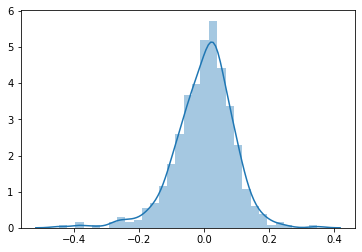

In [86]:
## Residual Analysis and Predictions 
y_train_rfe_pred=lr2_model.predict(X_train_rfe_sm)
res=y_train-y_train_rfe_pred 
sns.distplot(res) 

The distribution is centered around 0 and is normal,so from the residual analysis of the error terms we can conclude that the model is reliable.

In [87]:
# Predictions and Evaluation on the test set 
X_test_rfe_sm=sm.add_constant(X_test) 
X_test_rfe_sm.drop(removed_columns,axis=1,inplace=True) 
del X_test_rfe_sm['weekday_Sunday'] 
del X_test_rfe_sm['weekday_Saturday'] 
del X_test_rfe_sm['mnth_Feb'] 
del X_test_rfe_sm['weekday_Tuesday'] 
del X_test_rfe_sm['hum'] 
del X_test_rfe_sm['holiday_Not Holiday'] 
del X_test_rfe_sm['workingday_Working day'] 
X_test_rfe_sm.shape

(220, 14)

In [88]:
y_test_rfe_pred=lr2_model.predict(X_test_rfe_sm) 
r2_score(y_true=y_test,y_pred=y_test_rfe_pred)

0.8131863556593932

This R-squared value is comparable with that of the training set, so we can conclude that the model has generalised what it has learned well.

Thus our final model i.e. equation of the best fitted line is, 
cnt= 0.4362*temp + -0.1597*windspeed + -0.0749*season_Spring + 0.0343*season_Summer + 0.0862*season_Winter + 0.2349*yr_2019 + -0.0439*mnth_Dec + -0.0513*mnth_Jan + -0.0491*mnth_Jul + -0.0476*mnth_Nov + 0.0645*mnth_Sep + -0.0786*weathersit_Partially Clear + -0.2886*weathersit_Slightly Bad Weather  

- From the equation above it can be seen that temperature has a high positive influence on the number of users of bike sharing service.Warmer days are better for bike riding. 
- A slightly bad weather which includes light rain,snow etc, has a high negative impact on the number of users because such conditions are unfavourable for the use of bikes. 
- The other factor that has a high negative influence is windspeed, which is obvious since greater the windspeed, the more difficult it is to ride a bike. 
- In general it can be concluded that the demand for the bike sharing service is higher during warmer and calmer weather conditions with low wind speeds. Also the popularity of the bike sharing service seems to have increased from 2018 to 2019 which is a sure sign that more and more people are becoming open to using shared bikes as a means of transport. 
- If the company can develop appropriate strategies keeping the above factors in mind, they can surely run a profitable business once the covid-19 restrictions are eased.